<a href="https://colab.research.google.com/github/John-D-Boom/CompVision/blob/main/Siamese_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

In [82]:
class siameseDataset(Dataset):
    
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.images_frame = pd.read_csv(csv_file, names = ["Image1 Path", "Label1", "Image2 Path", "Label2", ])
        self.transform = transform

    def __len__(self):
        return len(self.images_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        defaultPathStart = '/content/drive/MyDrive/MLMI/CompVision/tiny-imagenet-200/'
        img_path1 = self.images_frame.iloc[idx, 0].split('/tiny-imagenet-200/')[1] #Unpacks path and fixes to be compatible with google drive
        img_path1 = defaultPathStart + img_path1
        label1 = self.images_frame.iloc[idx, 1]
        
        img_path2 = self.images_frame.iloc[idx, 2].split('/tiny-imagenet-200/')[1] #Unpacks path and fixes to be compatible with google drive
        img_path2 = defaultPathStart + img_path2
        label2 = self.images_frame.iloc[idx, 3]
        

        image1 = io.imread(img_path1)
        image2 = io.imread(img_path2)

        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
        
        sample = {'image1': image1, 'label1': label1, 'image2': image2, 'label2': label2}

        return sample

Now that the DataSet Class has been made, let's test it!

In [134]:
train_csv = '/content/drive/MyDrive/MLMI/CompVision/tiny-imagenet-200/train.csv'
resNetTransform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

unnormTransform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
train_dataloader = siameseDataset(csv_file = train_csv, transform= resNetTransform)
unnorm_dataloader = siameseDataset(csv_file = train_csv, transform = unnormTransform)

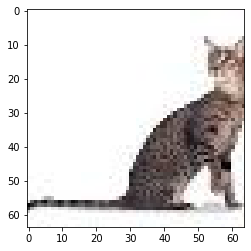

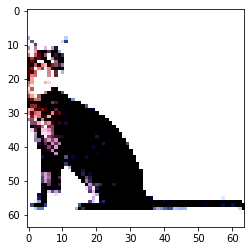

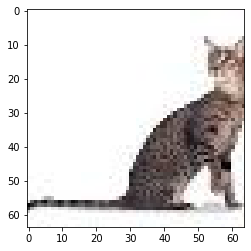

In [145]:
plt.figure(3)
orig_img = io.imread('/content/drive/MyDrive/MLMI/CompVision/tiny-imagenet-200/train/n02124075/n02124075_301.JPEG')
plt.imshow(orig_img)

plt.figure(0)
normalized_img = train_dataloader[0]["image2"]
plt.imshow(np.array(normalized_img).transpose(1, 2, 0))

plt.figure(1)
unnormalized_img = unnorm_dataloader[0]["image2"]
plt.imshow(np.array(unnormalized_img).transpose(1, 2, 0))

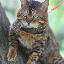

In [143]:


trans = transforms.ToPILImage()
img = trans(unnorm_dataloader[0]["image1"])
# img1 = transforms.ToPILImage(train_dataloader[i]["image1"])
img



# print(train_dataloader[i]["image1"].shape)
# plt.figure(1)
# plt.imshow(train_dataloader[i]["image2"])
# plt.show()

    

Every two images are different, and they repeat such that image2 becomes image1 in the next image. This is exactly how I set up my data, so it looks like it's working how I expected. Yay. Next notebook will build some simple models and get stuff training!!

The above stuff shows transforms as well. Turns out that To_PILImage doesn't deal with unnormalized images ***AT ALL*** for some odd reason. Gives a rainbow gross shape. just np.arraying the original image helps a lot

Anyway. I've now tested
* That images can be loaded
* That transformations including flips and normallization work as expected on both images
* Iterating through the Dataset works as per usual with a pytorch dataset
